# Análise Comparativa de 30 Países: Fatores-Chave para a Facilidade de Negócios

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium


- Dados

In [7]:
FILE = ['indicadores_paises_negocios.csv', 'cordenadas.csv']
df = pd.read_csv(FILE[0])
gdf = pd.read_csv(FILE[1])

In [8]:
display(df.head(10))
display(df.isnull().sum())
display(df.dtypes)
display(gdf.head())
display(gdf.dtypes)
display(gdf.isnull().sum())

,Região,País,Taxa(%),Infra-LPI,CPI,PIB_USDbilhões,Ease_of_Doing_Business_Position
0,Europa W/N,Alemanha,15.8,4.1,78,4526,22.0
1,Europa W/N,França,25.0,4.0,71,3052,32.0
2,Europa W/N,Reino Unido,25.0,3.8,71,3381,8.0
3,Europa W/N,Países Baixos,25.8,4.1,79,1118,24.0
4,Europa W/N,Bélgica,25.0,4.0,69,632,46.0
5,Europa W/N,Suécia,20.6,4.0,82,593,10.0
6,Europa W/N,Noruega,22.0,NaN,84,485,9.0
7,Europa W/N,Dinamarca,22.0,4.1,90,404,4.0
8,Europa W/N,Irlanda,12.5,3.6,77,545,24.0
9,Europa W/N,Finlândia,20.0,4.2,88,300,20.0


,0
Região,0
País,0
Taxa(%),0
Infra-LPI,1
CPI,0
PIB_USDbilhões,0
Ease_of_Doing_Business_Position,4


,0
Região,object
País,object
Taxa(%),float64
Infra-LPI,float64
CPI,int64
PIB_USDbilhões,object
Ease_of_Doing_Business_Position,float64


,País,Latitude,Longitude
0,Alemanha,51.00,9.00
1,França,48.85,2.35
2,Reino Unido,54.00,-2.00
3,Países Baixos,52.50,5.75
4,Bélgica,50.85,4.35


,0
País,object
Latitude,float64
Longitude,float64


,0
País,0
Latitude,0
Longitude,0


- Tratamento de tipos

In [9]:
df['PIB_USDbilhões'] = pd.to_numeric(df['PIB_USDbilhões'], errors='coerce')


- Preenchendo os valores nulos com o numero 0

In [10]:
col = ['Ease_of_Doing_Business_Position', 'Infra-LPI', 'PIB_USDbilhões']
for c in col:
  df[c] = df[c].fillna(0)

- Trocando os nomes das colunas

In [11]:
col = ['Região', 'País', 'Imposto', 'LPI', 'CPI', 'PIB', 'Facilidade Negocios']
df.columns = col

- Merge nas tabelas

In [12]:
df = pd.merge(df, gdf, on='País', how='inner')

- Exportando

In [ ]:
df.to_csv('indicadores_paises.csv', index=False)

In [13]:
df.head()

,Região,País,Imposto,LPI,CPI,PIB,Facilidade Negocios,Latitude,Longitude
0,Europa W/N,Alemanha,15.8,4.1,78,4526.0,22.0,51.00,9.00
1,Europa W/N,França,25.0,4.0,71,3052.0,32.0,48.85,2.35
2,Europa W/N,Reino Unido,25.0,3.8,71,3381.0,8.0,54.00,-2.00
3,Europa W/N,Países Baixos,25.8,4.1,79,1118.0,24.0,52.50,5.75
4,Europa W/N,Bélgica,25.0,4.0,69,632.0,46.0,50.85,4.35


**Filtrando os valores com zéro**

In [14]:
filter = (df['Facilidade Negocios'] > 0) & \
            (df['PIB'] > 0) & \
            (df['LPI'] > 0)
df_fil = df[filter]

# Melhor Infra Logistica

- LPI por país

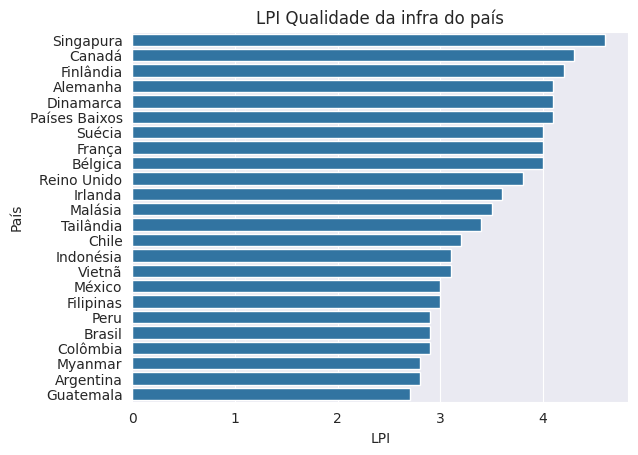

In [15]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='LPI', ascending=False),
    x='LPI',
    y='País'
)
plt.title('LPI Qualidade da infra do país')
plt.xlabel('LPI')
plt.ylabel('País')
plt.show();

# Melhor país para fazer negocios

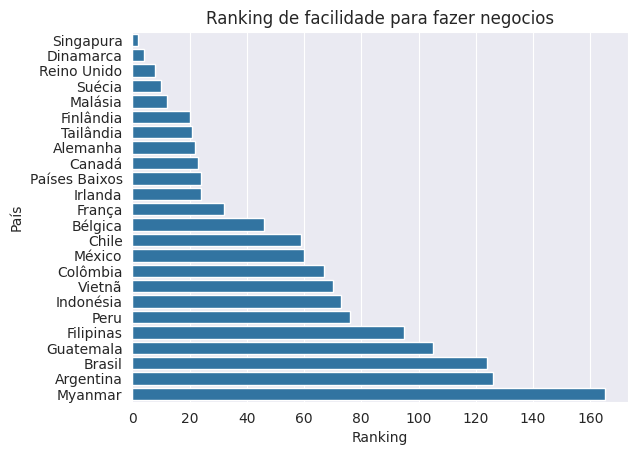

In [16]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='Facilidade Negocios', ascending=True),
    x='Facilidade Negocios',
    y='País'
)
plt.title('Ranking de facilidade para fazer negocios')
plt.xlabel('Ranking')
plt.ylabel('País')
plt.show();

# Correlação linear entre os indicadores 'Facilidade Negocios' e 'LPI'

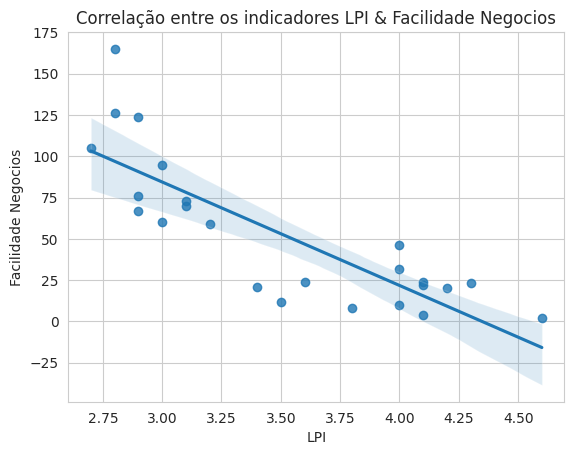

In [17]:
sns.set_style('whitegrid')
sns.regplot(
    data=df_fil,
    x='LPI',
    y='Facilidade Negocios'
)
plt.title('Correlação entre os indicadores LPI & Facilidade Negocios')
plt.xlabel('LPI')
plt.ylabel('Facilidade Negocios')
plt.show();

A linha de regressão descendente significa que um **LPI maior** (melhor logística) está associado a uma **posição melhor** no ranking de facilidade para fazer negócios (valores mais baixos). 📉

# Percepição da corrupção

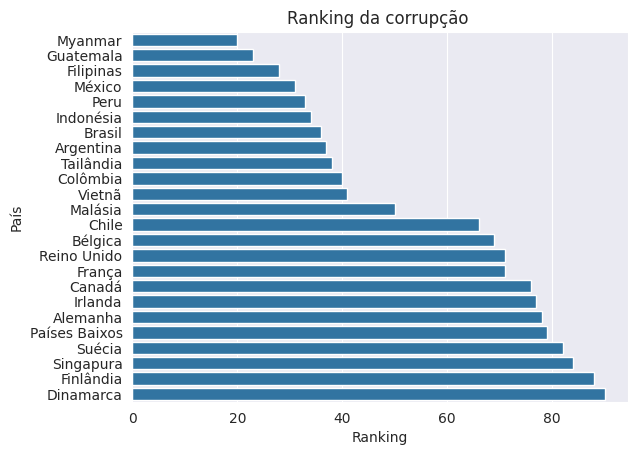

In [18]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='CPI', ascending=True),
    x='CPI',
    y='País'
)
plt.title('Ranking da corrupção ')
plt.xlabel('Ranking')
plt.ylabel('País')
plt.show();

# PIB

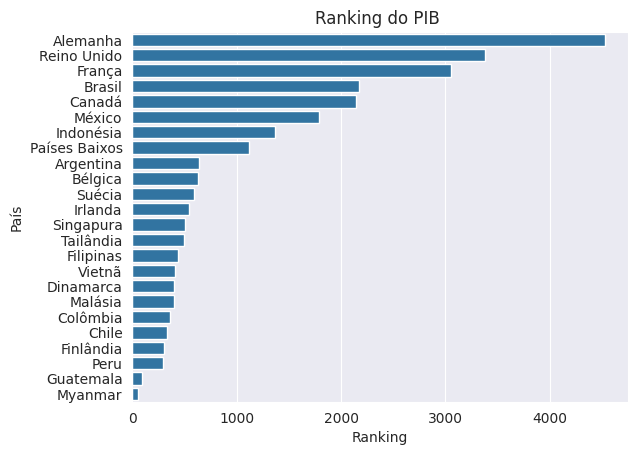

In [19]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='PIB', ascending=False),
    x='PIB',
    y='País'
)
plt.title('Ranking do PIB ')
plt.xlabel('Ranking')
plt.ylabel('País')
plt.show();

# Correlação linear entre PIB  e CPI(Corrupção)

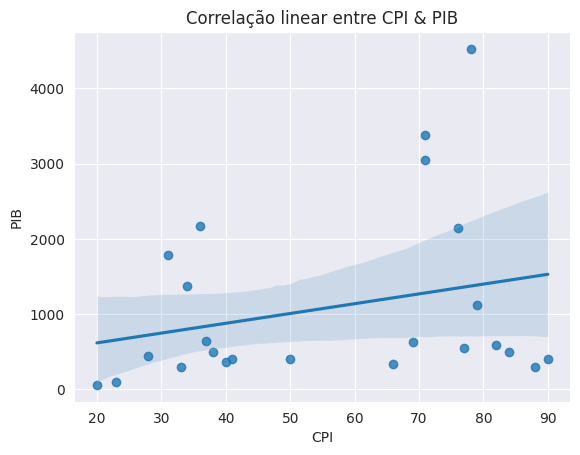

In [20]:
sns.set_style('darkgrid')
sns.regplot(
    data=df_fil,
    x='CPI',
    y='PIB'
)
plt.title('Correlação linear entre CPI & PIB')
plt.xlabel('CPI')
plt.ylabel('PIB')
plt.show();

> A linha de regressão não é perfeita, mas indica uma tendência: quanto maior o CPI (Índice de Percepção da Corrupção), mais alto o PIB.
> Na base de dados, temos países como México e Brasil, que têm um PIB elevado e um CPI baixo. Também temos países como Suécia e Irlanda, que têm um PIB menor e uma baixa percepção de corrupção.


# Imposto

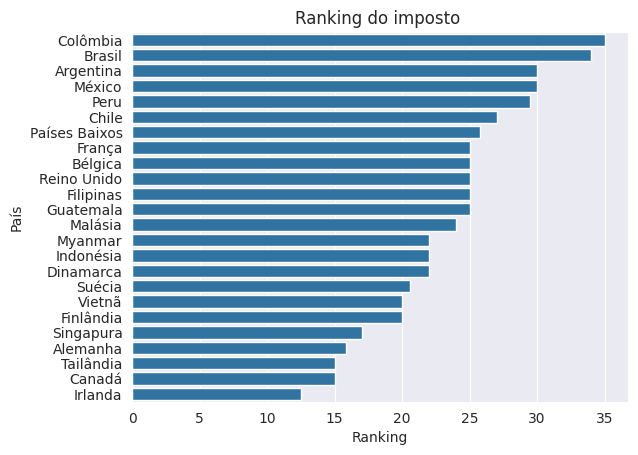

In [42]:
sns.set_style('darkgrid')
sns.barplot(
    data=df_fil.sort_values(by='Imposto', ascending=False),
    x='Imposto',
    y='País'
)
plt.title('Ranking do imposto ')
plt.xlabel('Ranking')
plt.ylabel('País')
plt.show();

# Filtrando os países com os melhores indicadores
- Baixa corrupção
- LPI elevado
- Facilidade para negócios

In [26]:
filter = (df_fil['LPI'] > 3.5) &\
         (df_fil['CPI'] > 60.0 ) &\
         (df_fil['Facilidade Negocios'] < 60)
country_great = df_fil[filter]

# Mapa dos países com os melhores indicadores

In [36]:

m = folium.Map(location=[40, 0], zoom_start=2)

for index, row in country_great.iterrows():
    popup_text = f"""
    <b>País:</b> {row['País']}<br>
    <b>Imposto:</b> {row['Imposto']}<br>
    <b>LPI:</b> {row['LPI']}<br>
    <b>Facilidade Negócios:</b> {row['Facilidade Negocios']}<br>
    <b>PIB:</b> {row['PIB']}<br>
    <b>CPI:</b> {row['CPI']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=200),
        tooltip=row['País']
    ).add_to(m)

m.save('mapa_paises_destaques.html')
m

# Mapa de todos os países

In [44]:

m = folium.Map(location=[40, 0], zoom_start=2)

for index, row in df_fil.iterrows():
    popup_text = f"""
    <b>País:</b> {row['País']}<br>
    <b>Imposto:</b> {row['Imposto']}<br>
    <b>LPI:</b> {row['LPI']}<br>
    <b>Facilidade Negócios:</b> {row['Facilidade Negocios']}<br>
    <b>PIB:</b> {row['PIB']}<br>
    <b>CPI:</b> {row['CPI']}
    """

    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=folium.Popup(popup_text, max_width=200),
        tooltip=row['País']
    ).add_to(m)

m.save('mapa_paises.html')

m